In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
## Reading the input data
data = pd.read_csv('3.csv')
data.head()

,X1,X2,X3,X4,X5,Y
0,13.233,38.320,55.618,91.466,106.030,1770.2
1,28.070,32.545,59.518,91.489,110.270,1928.1
2,28.240,34.104,57.003,85.282,109.090,1870.0
3,16.742,34.120,59.946,82.766,93.893,1625.6
4,17.225,21.305,53.570,94.055,103.480,1718.2


In [3]:
## Reading the input variable data
X = data[['X1','X2','X3','X4','X5']]
X.head()

,X1,X2,X3,X4,X5
0,13.233,38.320,55.618,91.466,106.030
1,28.070,32.545,59.518,91.489,110.270
2,28.240,34.104,57.003,85.282,109.090
3,16.742,34.120,59.946,82.766,93.893
4,17.225,21.305,53.570,94.055,103.480


In [4]:
## Reading the output data
Y = data['Y']
Y.head()

0    1770.2
1    1928.1
2    1870.0
3    1625.6
4    1718.2
Name: Y, dtype: float64

In [5]:
## Generating training and testing data
X_train, X_test = X[:2000].to_numpy(), X[2000:].to_numpy()
y_train, y_test = Y[:2000].to_numpy(), Y[2000:].to_numpy()
y_train = y_train.astype('int')
X_train.shape, X_test.shape

((2000, 5), (300, 5))

In [11]:
## Generating single layer grid-search model to find best parameters. Calculating best parameters, loss and 
## training the model on train data with calculated the best parameters
one_layer = [i for i in range(1,10)]
parameter_space = { "hidden_layer_sizes": one_layer, 
                   "activation": ["relu"], 
                   "solver": ["adam"],
                   "alpha": [0.00005, 0.0005, 0.005, 0.05, 0.5],
                   "learning_rate": ["constant"],
                   "max_iter": [500],
                   "learning_rate_init": [0.00001, 0.0001, 0.001, 0.01, 0.1],
                   "early_stopping":[True]
                  }
grid = GridSearchCV(MLPRegressor(random_state=3), parameter_space, verbose = 5, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best score for single layer ANN", grid.best_score_)
print("Best parameters for single layer ANN", grid.best_params_)

single_layer_mlp = MLPRegressor(**grid.best_params_)
single_layer_mlp.fit(X_train, y_train)
print("Single layer Neural Network MAE for=", single_layer_mlp.loss_)
single_layer_train_loss = single_layer_mlp.loss_
y_pred = single_layer_mlp.predict(X_test)


Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  1.6min finished


Best score for single layer ANN 0.9731056362629437
Best parameters for single layer ANN {'activation': 'relu', 'alpha': 5e-05, 'early_stopping': True, 'hidden_layer_sizes': 9, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
Single layer Neural Network MAE for= 120.40363198531907


In [7]:
## Calculated SSE for single layer ANN.
single_layer_best_score = grid.best_score_
single_layer_error = np.sum((y_pred - y_test)**2)
print("SSE for single layer ANN", single_layer_error)

SSE for single layer ANN 62215.05488220717


In [10]:
## Generating two layer grid-search model to find best parameters. Calculating best parameters, loss and 
## training the model on train data with calculated the best parameters
two_layer = []
for i in range(1,10):
    for j in range(1,10):
        two_layer.append((i,j))

parameter_space = { "hidden_layer_sizes": two_layer, 
                   "activation": ["relu"], 
                   "solver": ["adam"],
                   "alpha": [0.00005, 0.0005, 0.005, 0.05, 0.5],
                   "learning_rate": ["constant"],
                   "max_iter": [500],
                   "learning_rate_init": [0.00001, 0.0001, 0.001, 0.01, 0.1],
                   "early_stopping":[True]
                  }
grid = GridSearchCV(MLPRegressor(random_state=3), parameter_space, verbose = 5, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best score for two layer ANN", grid.best_score_)
print("Best parameters for two layer ANN", grid.best_params_)

two_layer_mlp = MLPRegressor(**grid.best_params_)
two_layer_mlp.fit(X_train, y_train)
print("Two layer Neural Network MAE =", two_layer_mlp.loss_)
two_layer_train_loss = two_layer_mlp.loss_
y_pred = two_layer_mlp.predict(X_test)

Fitting 3 folds for each of 2025 candidates, totalling 6075 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | e

Best score for two layer ANN 0.9755546580098092
Best parameters for two layer ANN {'activation': 'relu', 'alpha': 5e-05, 'early_stopping': True, 'hidden_layer_sizes': (6, 8), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
Two layer Neural Network MAE = 119.34492701745616


In [12]:
## Calculated SSE for two layer ANN.
two_layer_best_score = grid.best_score_
two_layer_error = np.sum((y_pred - y_test)**2)
print("SSE for two layer ANN", two_layer_error)

SSE for two layer ANN 77532.39566342026


In [13]:
## Generating three layer grid-search model to find best parameters. Calculating best parameters, loss and 
## training the model on train data with calculated the best parameters
three_layer = []
for i in range(1,10):
    for j in range(1,10):
        for k in range(1,10):
            three_layer.append((i,j,k))

parameter_space = { "hidden_layer_sizes": three_layer, 
                   "activation": ["relu"], 
                   "solver": ["adam"],
                   "alpha": [0.00005, 0.0005, 0.005, 0.05, 0.5],
                   "learning_rate": ["constant"],
                   "max_iter": [500],
                   "learning_rate_init": [0.00001, 0.0001, 0.001, 0.01, 0.1],
                   "early_stopping":[True]
                  }
grid = GridSearchCV(MLPRegressor(random_state=3), parameter_space, verbose = 5, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best score for three layer ANN", grid.best_score_)
print("Best parameters for three layer ANN", grid.best_params_)

three_layer_mlp = MLPRegressor(**grid.best_params_)
three_layer_mlp.fit(X_train, y_train)
print("Three layer Neural Network MAE =", three_layer_mlp.loss_)
three_layer_train_loss = three_layer_mlp.loss_
y_pred = three_layer_mlp.predict(X_test)

Fitting 3 folds for each of 18225 candidates, totalling 54675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | e

Best score for three layer ANN 0.977937255000097
Best parameters for three layer ANN {'activation': 'relu', 'alpha': 0.0005, 'early_stopping': True, 'hidden_layer_sizes': (8, 5, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
Three layer Neural Network MAE = 111.59565488123778


In [14]:
## Calculated SSE for three layer ANN.
three_layer_best_score = grid.best_score_
three_layer_error = np.sum((y_pred - y_test)**2)
print("SSE for two layer ANN", three_layer_error)

SSE for two layer ANN 70172.6058433293


In [15]:
## Generating four layer grid-search model to find best parameters. Calculating best parameters, loss and 
## training the model on train data with calculated the best parameters
four_layer = []
for i in range(1,10):
    for j in range(1,10):
        for k in range(1,10):
            for l in range(1,10):
                four_layer.append((i,j,k,l))

parameter_space = { "hidden_layer_sizes": four_layer, 
                   "activation": ["relu"], 
                   "solver": ["adam"],
                   "alpha": [0.00005, 0.0005],
                   "learning_rate": ["constant"],
                   "max_iter": [500],
                   "learning_rate_init": [0.01],
                   "early_stopping":[True]
                  }
grid = GridSearchCV(MLPRegressor(random_state=3), parameter_space, verbose = 5, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best score for four layer ANN", grid.best_score_)
print("Best parameters for four layer ANN", grid.best_params_)

four_layer_mlp = MLPRegressor(**grid.best_params_)
four_layer_mlp.fit(X_train, y_train)
print("Four layer Neural Network MAE =", four_layer_mlp.loss_)
four_layer_train_loss = four_layer_mlp.loss_
y_pred = four_layer_mlp.predict(X_test)

Fitting 3 folds for each of 13122 candidates, totalling 39366 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | e

Best score for four layer ANN 0.9776153129459398
Best parameters for four layer ANN {'activation': 'relu', 'alpha': 0.0005, 'early_stopping': True, 'hidden_layer_sizes': (8, 9, 5, 7), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
Four layer Neural Network MAE = 117.4353353074388


In [53]:
## Calculated SSE for four layer ANN.
four_layer_best_score = grid.best_score_
four_layer_error = np.sum((y_pred - y_test)**2)
print("SSE for two layer ANN", four_layer_error)

SSE for two layer ANN 68589.91037625851


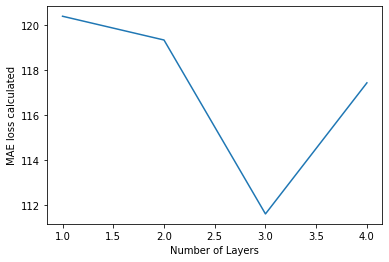

In [17]:
## Plotting loss vs Number of layers.
plt.plot([1 ,2 ,3,4], [single_layer_train_loss, two_layer_train_loss, three_layer_train_loss, four_layer_train_loss])
plt.xlabel('Number of Layers')
plt.ylabel("MAE loss calculated")
plt.show()

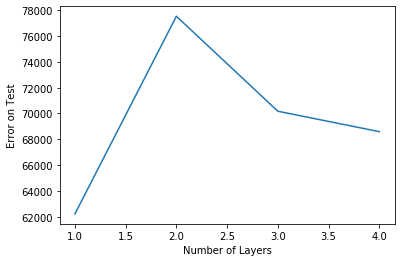

In [18]:
## Plotting error test vs Number of layers.
plt.plot([1 ,2 ,3,4], [single_layer_error, two_layer_error, three_layer_error, four_layer_error])
plt.xlabel('Number of Layers')
plt.ylabel("Error on Test")
plt.show()

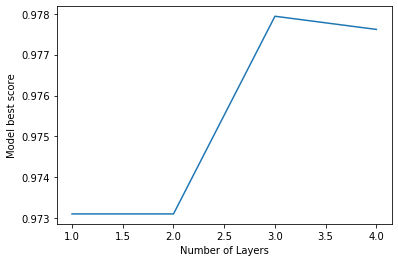

In [19]:
## Plotting best scores vs Number of layers.
plt.plot([1 ,2 ,3,4], [single_layer_best_score, two_layer_best_score, three_layer_best_score, four_layer_best_score])
plt.xlabel('Number of Layers')
plt.ylabel("Model best score")
plt.show()

I have set a range of learning rate in (0.00001, 0.0001, 0.001, 0.01, 0.1) where are for regularization parameter (0.00005, 0.0005, 0.005, 0.05, 0.5) keeping maximum iterations to 500 and default batch number sizes for one, two and three layer neural network. For four layer neural network I have narrowed the learning rate to 0.01 and regularization parameter to (0.00005, 0.0005) by observing the results obtained in single, two and three layer networks. I have calculated the best score(not the accuracy), mean absolute error calculated on train data and SSE on the test data for each layered neural network. I have plotted all the obtained results with respect to the number of layers in the neural network as shown above. From the above graphs we can see that the model starts overfitting once we move from three layer neural network to a four layer neural network also three layer model has highest best score among the others. Thus we will be choosing a three layer neural network with parameters calculated using the GrisearchCV. 

In [56]:
## Generating linear regression model.
import statsmodels.api as sm
x_reg, y_reg = X_train, y_train
x_reg_test, y_reg_test = X_test, y_test
x_reg = sm.add_constant(x_reg)
model = sm.OLS(y_reg, x_reg).fit()
y_pred_reg = model.predict(x_reg)

In [57]:
## Calculating SSE for the linear regression model.
regression_error_train = np.sum((np.array(y_pred_reg) - y_reg)**2)
print("SSE for linear regression model", regression_error_train)

SSE for linear regression model 160777.321576731


From the above model we can see that for the best ann model the SSE error on the data is 68589.91037625851 where as for the for the regression model the SSE error is 160777.321576731 thus from the results we can see that that the Neural network model is much more accurate than the linear regression model. Thus we can conclude from the result that the a well designed ANN model works better than the linear regression model.